In [79]:
#Importing Required Libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [80]:
# Load Digits Dataset
digits = load_digits()

In [81]:
# Priting rows and columns

num_images = digits.data.shape[0]
print(f"Total number of images in the Digits dataset: {num_images}")

num_rows, num_columns = digits.data.shape

print(f"Number of images (rows): {num_rows}")
print(f"Number of features (columns): {num_columns}")

print("\n Feature Names: \n")
print(digits.feature_names)

Total number of images in the Digits dataset: 1797
Number of images (rows): 1797
Number of features (columns): 64

 Feature Names: 

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [82]:
# Spliting data into X and Y
X, y = digits.data, digits.target

In [83]:
# Each image is 8x8 pixels = 64 features
print(f"Shape of images: {X.shape}")

Shape of images: (1797, 64)


In [84]:
# Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [96]:
# List of K values to try
k_values = [1, 3, 5, 7, 9, 11,13,15,17,19,21,23,25,27,29]

In [97]:
# List for accuracy
accuracies = []

In [98]:
# Train and evaluate KNN for each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} -> Accuracy: {acc:.4f}")

K=1 -> Accuracy: 0.9833
K=3 -> Accuracy: 0.9889
K=5 -> Accuracy: 0.9926
K=7 -> Accuracy: 0.9907
K=9 -> Accuracy: 0.9796
K=11 -> Accuracy: 0.9796
K=13 -> Accuracy: 0.9778
K=15 -> Accuracy: 0.9759
K=17 -> Accuracy: 0.9778
K=19 -> Accuracy: 0.9722
K=21 -> Accuracy: 0.9722
K=23 -> Accuracy: 0.9722
K=25 -> Accuracy: 0.9667
K=27 -> Accuracy: 0.9667
K=29 -> Accuracy: 0.9630


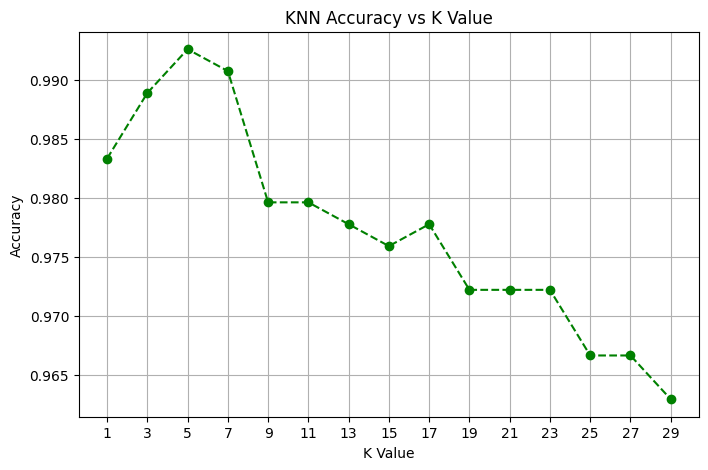

In [99]:
# Plot Accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='green')
plt.title('KNN Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [100]:
# Find maximum accuracy
max_accuracy = max(accuracies)
min_accuracy = min(accuracies)

# Find the corresponding best k
best_k = k_values[accuracies.index(max_accuracy)]
worst_k=k_values[accuracies.index(min_accuracy)]

print(f"\n Best K = {best_k} with Accuracy = {max_accuracy:.4f}")
print(f"\n Worst Best K = {worst_k} with Accuracy = {min_accuracy:.4f}")


 Best K = 5 with Accuracy = 0.9926

 Worst Best K = 29 with Accuracy = 0.9630


<h1> Cross Validation</h1>

K=1 -> Cross-validated Accuracy: 0.9644
K=3 -> Cross-validated Accuracy: 0.9666
K=5 -> Cross-validated Accuracy: 0.9627
K=7 -> Cross-validated Accuracy: 0.9599
K=9 -> Cross-validated Accuracy: 0.9566
K=11 -> Cross-validated Accuracy: 0.9555
K=13 -> Cross-validated Accuracy: 0.9555
K=15 -> Cross-validated Accuracy: 0.9544
K=17 -> Cross-validated Accuracy: 0.9533
K=19 -> Cross-validated Accuracy: 0.9505
K=21 -> Cross-validated Accuracy: 0.9488
K=23 -> Cross-validated Accuracy: 0.9488
K=25 -> Cross-validated Accuracy: 0.9455
K=27 -> Cross-validated Accuracy: 0.9438
K=29 -> Cross-validated Accuracy: 0.9410


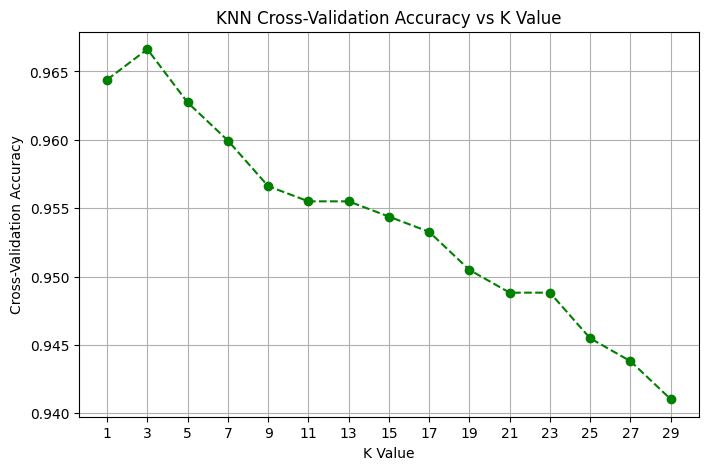


 Best K = 3 with Accuracy = 0.9666

 Worst K = 29 with Accuracy = 0.9410


In [102]:
accuracies = []

# Cross-validation using K-fold cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    
    # Compute the mean of the cross-validation scores
    mean_cv_score = np.mean(cv_scores)
    accuracies.append(mean_cv_score)
    
    print(f"K={k} -> Cross-validated Accuracy: {mean_cv_score:.4f}")

# Plot Accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='green')
plt.title('KNN Cross-Validation Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find maximum accuracy
max_accuracy = max(accuracies)
min_accuracy = min(accuracies)

# Find the corresponding best k
best_k = k_values[accuracies.index(max_accuracy)]
worst_k = k_values[accuracies.index(min_accuracy)]

print(f"\n Best K = {best_k} with Accuracy = {max_accuracy:.4f}")
print(f"\n Worst K = {worst_k} with Accuracy = {min_accuracy:.4f}")